In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('EV_Car_data.csv')

In [4]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,4400000
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,2400000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,4515200
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,5443200
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,2639760


In [5]:
le = preprocessing.LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Model'] = le.fit_transform(df['Model'])
df['RapidCharge'] = le.fit_transform(df['RapidCharge'])
df['PowerTrain'] = le.fit_transform(df['PowerTrain'])
df['PlugType'] = le.fit_transform(df['PlugType'])
df['BodyStyle'] = le.fit_transform(df['BodyStyle'])
df['Segment'] = le.fit_transform(df['Segment'])

In [6]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price
0,30,46,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,1,0,2,7,3,5,4400000
1,31,33,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,1,2,2,1,2,5,2400000
2,23,0,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,1,0,2,2,3,5,4515200
3,2,101,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,1,2,2,6,3,5,5443200
4,9,78,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,1,2,2,1,1,4,2639760


In [7]:
X = df[['Brand', 'Model', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats']]

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[102246.85436893205,
 32949.44924242424,
 19878.927836592353,
 14577.074712643676,
 11015.25087719298,
 8523.646481588588,
 6805.2858585858585,
 5690.481218781219,
 4929.170138195139,
 4183.961363636364]

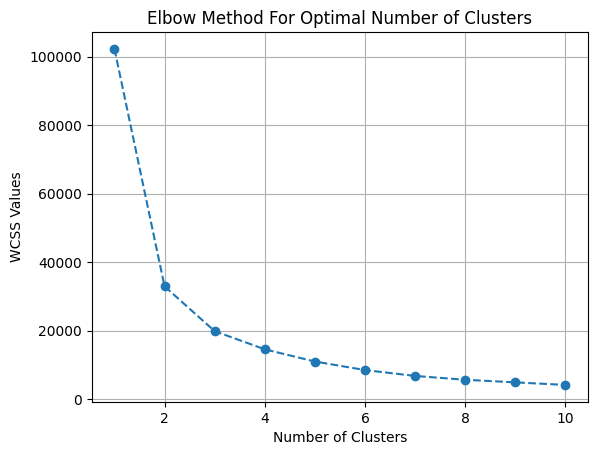

In [10]:
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.grid(True)
plt.show()

### KMeans Clustering
The elbow method suggests that a cluster number around 4 might be optimal, as indicated by the 'Elbow Method For Optimal Number of Clusters' plot. This means that the selected features can group the electric vehicles into roughly four distinct categories.

In [11]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10)
y_kmeans = kmeans_model.fit_predict(X)

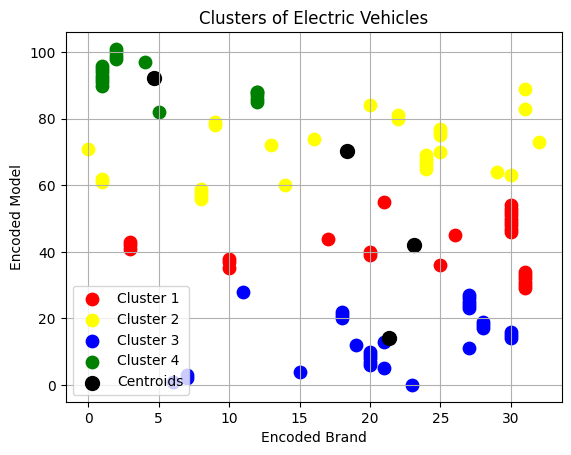

In [12]:
m = np.array(X)
plt.scatter(m[y_kmeans == 0, 0], m[y_kmeans == 0, 1], s=80, c='red', label='Cluster 1')
plt.scatter(m[y_kmeans == 1, 0], m[y_kmeans == 1, 1], s=80, c='yellow', label='Cluster 2')
plt.scatter(m[y_kmeans == 2, 0], m[y_kmeans == 2, 1], s=80, c='blue', label='Cluster 3')
plt.scatter(m[y_kmeans == 3, 0], m[y_kmeans == 3, 1], s=80, c='green', label='Cluster 4')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Clusters of Electric Vehicles')
plt.xlabel('Encoded Brand')
plt.ylabel('Encoded Model')
plt.legend()
plt.grid(True)
plt.show()

### Clusters of Electric Vehicles
The scatter plot titled 'Clusters of Electric Vehicles' provides an overview of how electric vehicles group based on their brand and model. Each cluster may represent vehicles with similar attributes. This can be further analyzed by examining the vehicles within each cluster to understand shared characteristics.

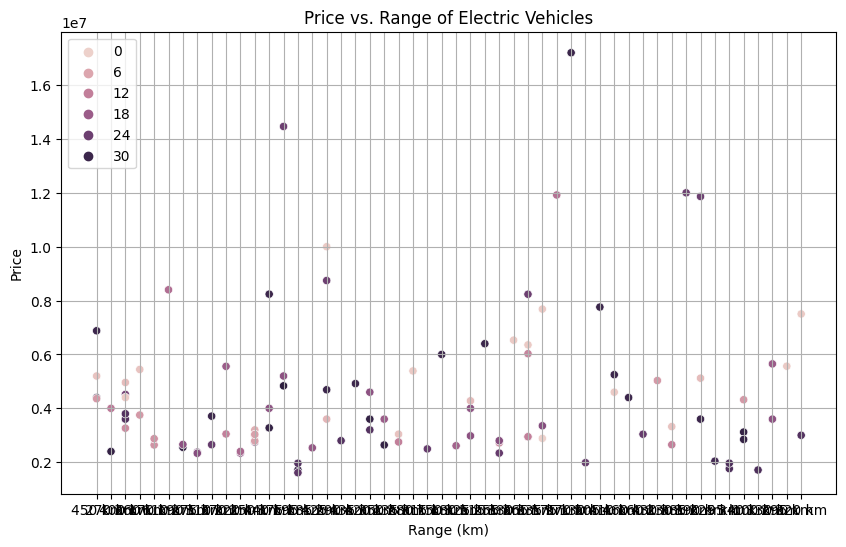

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Range', y='Price', hue='Brand')
plt.title('Price vs. Range of Electric Vehicles')
plt.xlabel('Range (km)')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Price vs. Range
The scatter plot suggests a positive correlation between price and range for many brands. However, some brands offer higher range at lower prices, indicating better value for money.

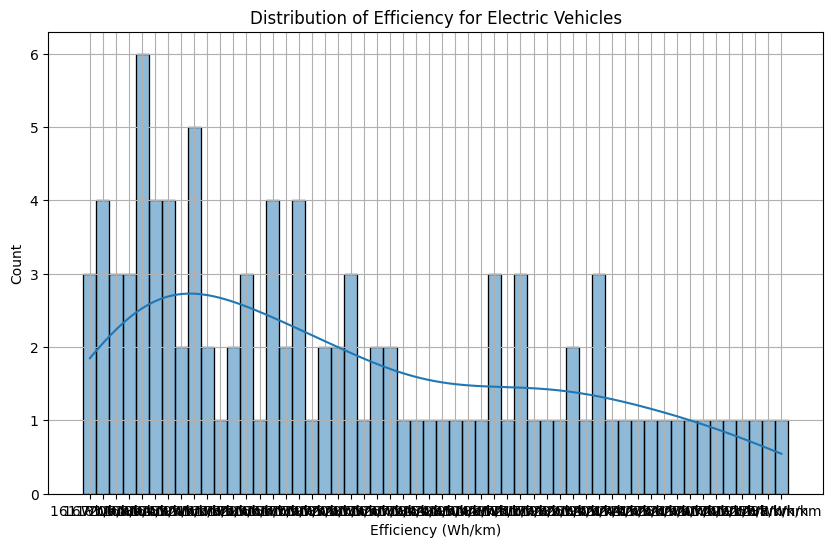

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Efficiency'], bins=30, kde=True)
plt.title('Distribution of Efficiency for Electric Vehicles')
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Efficiency Distribution:
The efficiency histogram reveals that most electric vehicles have an efficiency within a particular range. Vehicles that deviate significantly from this norm might offer unique features or technology.

C:\Users\omarm\AppData\Local\Temp\ipykernel_16260\460693480.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Segment', y='Price', ci=None)


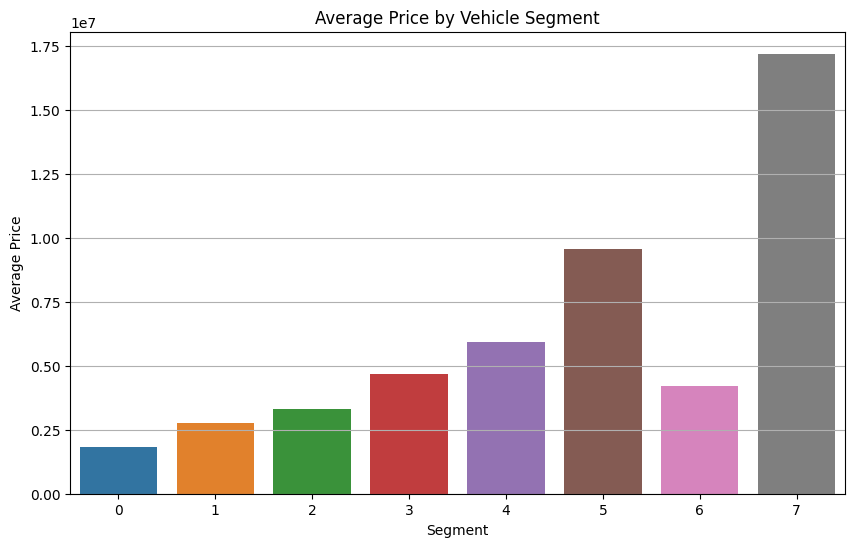

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Segment', y='Price', ci=None)
plt.title('Average Price by Vehicle Segment')
plt.xlabel('Segment')
plt.ylabel('Average Price')
plt.grid(axis='y')
plt.show()

C:\Users\omarm\AppData\Local\Temp\ipykernel_16260\609203772.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Segment', y='Range', ci=None)


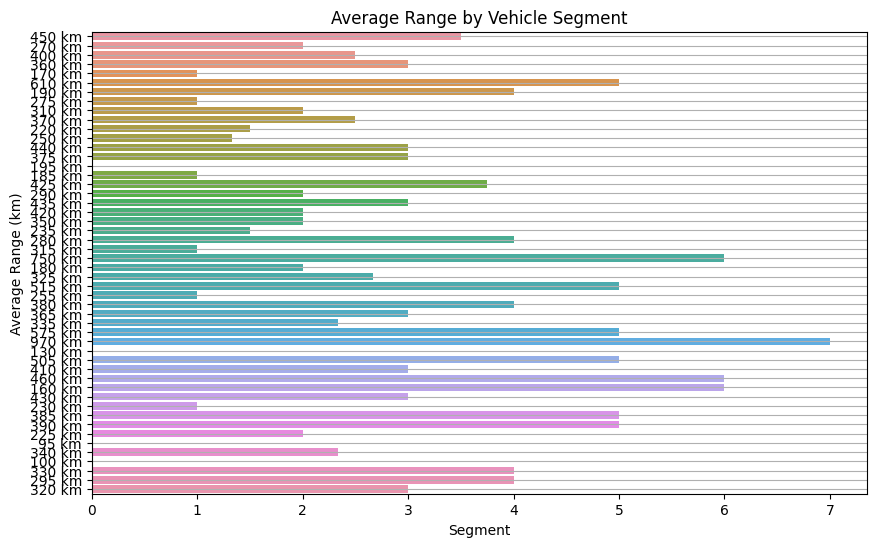

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Segment', y='Range', ci=None)
plt.title('Average Range by Vehicle Segment')
plt.xlabel('Segment')
plt.ylabel('Average Range (km)')
plt.grid(axis='y')
plt.show()

### Segment Analysis
The bar plots for segments indicate that different vehicle segments have varying price points and ranges. For instance, some segments might prioritize range over luxury or vice versa.